In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
current_dir = Path().resolve()

data_dir = current_dir / 'data'
os.chdir(data_dir)


In [4]:
os.listdir()

['Cities.csv',
 'Conferences.csv',
 'MConferenceTourneyGames.csv',
 'MGameCities.csv',
 'MMasseyOrdinals.csv',
 'MNCAATourneyCompactResults.csv',
 'MNCAATourneyDetailedResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MNCAATourneySeeds.csv',
 'MNCAATourneySlots.csv',
 'MRegularSeasonCompactResults.csv',
 'MRegularSeasonDetailedResults.csv',
 'MSeasons.csv',
 'MSecondaryTourneyCompactResults.csv',
 'MSecondaryTourneyTeams.csv',
 'MTeamCoaches.csv',
 'MTeamConferences.csv',
 'MTeams.csv',
 'MTeamSpellings.csv',
 'SampleSubmissionStage1.csv',
 'SeedBenchmarkStage1.csv',
 'WConferenceTourneyGames.csv',
 'WGameCities.csv',
 'WNCAATourneyCompactResults.csv',
 'WNCAATourneyDetailedResults.csv',
 'WNCAATourneySeeds.csv',
 'WNCAATourneySlots.csv',
 'WRegularSeasonCompactResults.csv',
 'WRegularSeasonDetailedResults.csv',
 'WSeasons.csv',
 'WSecondaryTourneyCompactResults.csv',
 'WSecondaryTourneyTeams.csv',
 'WTeamConferences.csv',
 'WTeams.csv',
 'WTeamSpellings.csv']

EDA

In [5]:
files = os.listdir(data_dir)
dataframes = {}

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(data_dir, file)
        df_name = os.path.splitext(file)[0]
        try:
            dataframes[df_name] = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            # Try a different encoding if utf-8 fails
            dataframes[df_name] = pd.read_csv(file_path, encoding='latin1')
            
        print(f'Loaded {file} into DataFrame {df_name}')


Loaded Cities.csv into DataFrame Cities
Loaded Conferences.csv into DataFrame Conferences
Loaded MConferenceTourneyGames.csv into DataFrame MConferenceTourneyGames
Loaded MGameCities.csv into DataFrame MGameCities
Loaded MMasseyOrdinals.csv into DataFrame MMasseyOrdinals
Loaded MNCAATourneyCompactResults.csv into DataFrame MNCAATourneyCompactResults
Loaded MNCAATourneyDetailedResults.csv into DataFrame MNCAATourneyDetailedResults
Loaded MNCAATourneySeedRoundSlots.csv into DataFrame MNCAATourneySeedRoundSlots
Loaded MNCAATourneySeeds.csv into DataFrame MNCAATourneySeeds
Loaded MNCAATourneySlots.csv into DataFrame MNCAATourneySlots
Loaded MRegularSeasonCompactResults.csv into DataFrame MRegularSeasonCompactResults
Loaded MRegularSeasonDetailedResults.csv into DataFrame MRegularSeasonDetailedResults
Loaded MSeasons.csv into DataFrame MSeasons
Loaded MSecondaryTourneyCompactResults.csv into DataFrame MSecondaryTourneyCompactResults
Loaded MSecondaryTourneyTeams.csv into DataFrame MSecondar

In [6]:
print('DataFrames available: ')
for df_name in dataframes.keys():
    print(df_name)

DataFrames available: 
Cities
Conferences
MConferenceTourneyGames
MGameCities
MMasseyOrdinals
MNCAATourneyCompactResults
MNCAATourneyDetailedResults
MNCAATourneySeedRoundSlots
MNCAATourneySeeds
MNCAATourneySlots
MRegularSeasonCompactResults
MRegularSeasonDetailedResults
MSeasons
MSecondaryTourneyCompactResults
MSecondaryTourneyTeams
MTeamCoaches
MTeamConferences
MTeams
MTeamSpellings
SampleSubmissionStage1
SeedBenchmarkStage1
WConferenceTourneyGames
WGameCities
WNCAATourneyCompactResults
WNCAATourneyDetailedResults
WNCAATourneySeeds
WNCAATourneySlots
WRegularSeasonCompactResults
WRegularSeasonDetailedResults
WSeasons
WSecondaryTourneyCompactResults
WSecondaryTourneyTeams
WTeamConferences
WTeams
WTeamSpellings


In [25]:
print("\nDescriptive statistics for MTeams:")
print(dataframes['MTeams'].describe())


print("\nDescriptive statistics for MSeasons:")
print(dataframes['MSeasons'].describe())

print("\nDescriptive statistics for MRegularSeasonCompactResults:")
print(dataframes['MRegularSeasonCompactResults'].describe())


Descriptive statistics for MTeams:
            TeamID  FirstD1Season  LastD1Season
count   380.000000     380.000000    380.000000
mean   1290.500000    1989.618421   2023.952632
std     109.840794       9.755814      5.686894
min    1101.000000    1985.000000   1985.000000
25%    1195.750000    1985.000000   2025.000000
50%    1290.500000    1985.000000   2025.000000
75%    1385.250000    1986.250000   2025.000000
max    1480.000000    2025.000000   2025.000000

Descriptive statistics for MSeasons:
            Season
count    41.000000
mean   2005.000000
std      11.979149
min    1985.000000
25%    1995.000000
50%    2005.000000
75%    2015.000000
max    2025.000000

Descriptive statistics for MRegularSeasonCompactResults:
              Season         DayNum        WTeamID         WScore  \
count  190771.000000  190771.000000  190771.000000  190771.000000   
mean     2006.170629      73.483690    1287.589455      76.849112   
std        11.573526      34.280004     104.888255      11

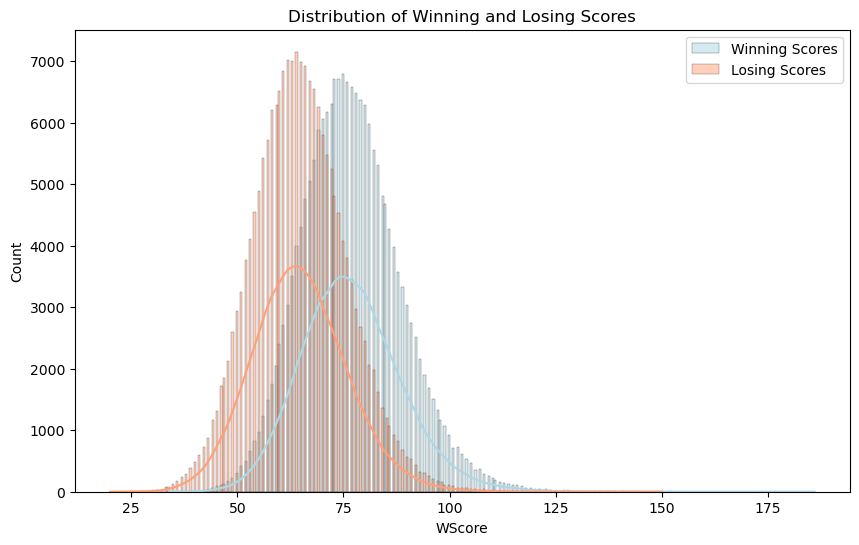

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(dataframes['MRegularSeasonCompactResults']['WScore'], kde=True, color='#ADD8E6', label='Winning Scores', alpha=0.5) 

sns.histplot(dataframes['MRegularSeasonCompactResults']['LScore'], kde=True, color='#FFA07A', label='Losing Scores', alpha=0.5)

plt.title('Distribution of Winning and Losing Scores')
plt.legend()
plt.show()

# data seems to be normally distributed for winning/losing scores

In [ ]:
#create dataframe with all scores
m_winning_scores = dataframes['MRegularSeasonCompactResults'][['WTeamID', 'WScore']].rename(columns={'WTeamID': 'TeamID', 'WScore': 'Score'})
m_losing_scores = dataframes['MRegularSeasonCompactResults'][['LTeamID', 'LScore']].rename(columns={'LTeamID': 'TeamID', 'LScore': 'Score'})
m_all_scores = pd.concat([m_winning_scores, m_losing_scores])



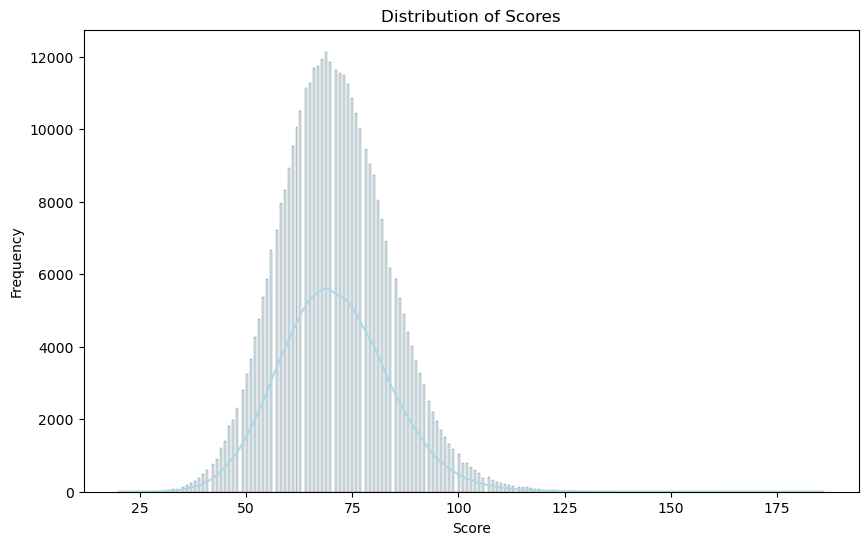

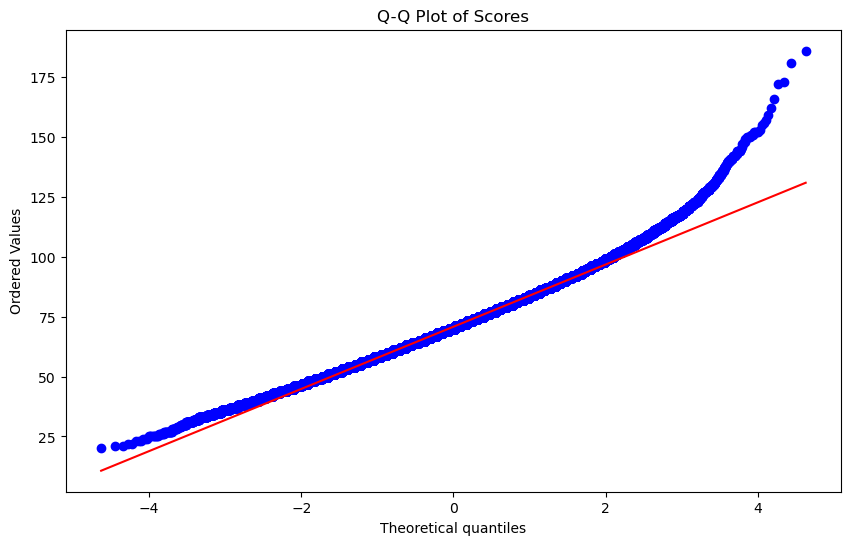

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(m_all_scores['Score'], kde=True, color='#ADD8E6')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(m_all_scores['Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Scores')
plt.show()

# the scores have a heavier right tail - implying that the while most teams score within a predictable range, 
# there are some teams that score significantly higher than the average. 

In [ ]:

team_stats = m_all_scores.groupby('TeamID')['Score'].agg(['mean', 'std']).reset_index()

m_all_scores = m_all_scores.merge(team_stats, on='TeamID', how='left')

m_all_scores['StandardizedScore'] = (m_all_scores['Score'] - m_all_scores['mean']) / m_all_scores['std']

# Identify teams that consistently score above 1 standard deviation
high_scorers = m_all_scores[m_all_scores['StandardizedScore'] > 1]

# Count the number of times each team scores above 1 standard deviation
high_scorers_count = high_scorers['TeamID'].value_counts().reset_index()
high_scorers_count.columns = ['TeamID', 'HighScoreCount']

high_scorers_count = high_scorers_count.merge(dataframes['MTeams'][['TeamID', 'TeamName']], on='TeamID', how='left')


In [ ]:
# we can use this information to identify teams that are consistently high scorers. 
# And Implement as a feature in our model
high_scorers_count


,TeamID,HighScoreCount,TeamName
0,1433,219,VCU
1,1314,216,North Carolina
2,1181,209,Duke
3,1200,206,Fordham
4,1140,206,BYU
...,...,...,...
375,1118,5,Armstrong St
376,1478,5,Le Moyne
377,1327,3,Okla City
378,1479,3,Mercyhurst


In [ ]:
# average points scored by each team throughout all years


m_average_scores = m_all_scores.groupby('TeamID')['Score'].mean().reset_index()

dataframes['MTeams'] = dataframes['MTeams'].merge(m_average_scores, on='TeamID', how='left')

# dataframes['MTeams'].rename(columns={'Score': 'AvgPoints'}, inplace=True)
# print(dataframes['MTeams'].head())


   TeamID     TeamName  FirstD1Season  LastD1Season  AvgPoints
0    1101  Abilene Chr           2014          2025  69.678457
1    1102    Air Force           1985          2025  63.832727
2    1103        Akron           1985          2025  71.384747
3    1104      Alabama           1985          2025  73.227273
4    1105  Alabama A&M           2000          2025  65.863112


In [18]:
m_winning_scores_by_season = dataframes['MRegularSeasonCompactResults'][['Season', 'WTeamID', 'WScore']].rename(columns={'WTeamID': 'TeamID', 'WScore': 'Score'})
m_losing_scores_by_season = dataframes['MRegularSeasonCompactResults'][['Season', 'LTeamID', 'LScore']].rename(columns={'LTeamID': 'TeamID', 'LScore': 'Score'})
m_all_scores_by_season = pd.concat([m_winning_scores_by_season, m_losing_scores_by_season])

m_average_scores_by_season = m_all_scores_by_season.groupby(['TeamID', 'Season'])['Score'].mean().reset_index()
m_average_scores_by_season.rename(columns={'Score': 'AvgPoints'}, inplace=True)
print(m_average_scores_by_season.head())


   TeamID  Season  AvgPoints
0    1101    2014  63.142857
1    1101    2015  61.000000
2    1101    2016  69.851852
3    1101    2017  67.880000
4    1101    2018  70.666667
